Act 2. Fundamentos Big Data

Alumno: Jose Sepulveda

## Actividad 1

**Primera parte de la Actividad** (Hasta 6 puntos)
El/la alumno/a deberá enviar un .ipynb con Gráficos en Python similares a las vistas en la lección actual.

Podría ser un ejemplo similar al de alguno de los apuntes.

Pero, lo ideal será tratar de buscar algo de información en Internet para presentar un ejemplo diferente.

Obviamente, podría ser con pie charts, o con gráficos en 3 dimensiones, etc.

Queda a elección tuya !

Nota: Para esta actividad es posible preguntar alguna duda, puesto que tiene que ver con el propio manual de la asignatura.

(En cambio en la segunda parte de la misma no será posible preguntar dudas)

En el propio archivo .ipynb deja alguna celda en blanco y continúa con la segunda parte de la actividad.

**Respuesta**: para los siguientes gráficos se hara uso del paquete *plotline*

In [1]:
from plotnine import *
import pandas as pd
import numpy as np

# se lee data
df = pd.read_csv("finanzas2020.csv", sep = ';')

Se va a modificar el daframe para los próximos gráficos

In [2]:
# convertimos de wide to long dataframe
df_long = pd.melt(df, id_vars=['Id'], value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                                  'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# agrupacion por trimestre
# condiciones de agrupacion
conditions = [
    (np.isin(df_long.variable, ['Enero', 'Febrero', 'Marzo'])),
    (np.isin(df_long.variable, ['Abril', 'Mayo', 'Junio'])),
    (np.isin(df_long.variable, ['Julio', 'Agosto', 'Septiembre'])),
    (np.isin(df_long.variable, ['Octubre', 'Noviembre', 'Diciembre']))
    ]

# tags de los nuevos grupos
values = ['Tri_1', 'Tri_2', 'Tri_3', 'Tri_4']

# crea columna en dataframe con los nuevos tags
df_long["Trimestre"] = np.select(conditions, values)

# se agrupa por trimestre y se suman los valores
df_tri = df_long.groupby(['Id', 'Trimestre']).value.sum().to_frame().reset_index()

### Gráfico de lineas

Evalución en los diferentes trimestres

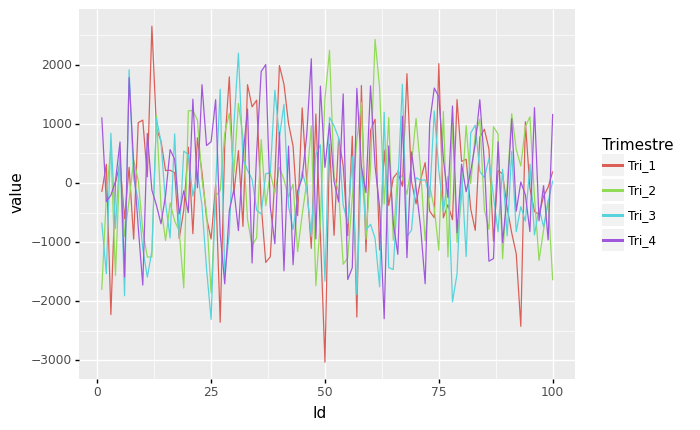

<ggplot: (26607713)>

In [3]:

(
    ggplot(df_tri, aes(x='Id', y='value', color='Trimestre'))
    + geom_line()
)

### Histograma

Distribución de los valores. Se crean bin de 200

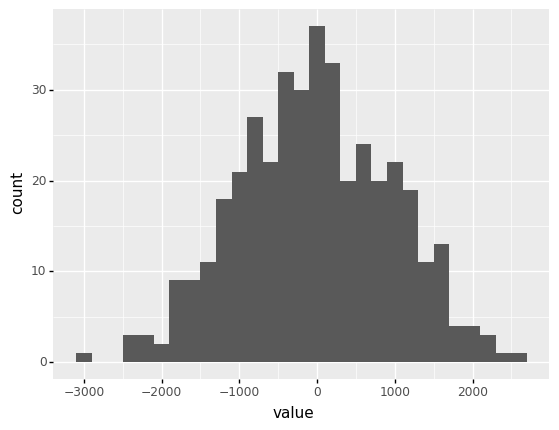

<ggplot: (29063659)>

In [4]:
(
    ggplot(df_tri, aes("value")) + #, fill = cut)
  geom_histogram(binwidth = 200)
)

Histograma por trimestre

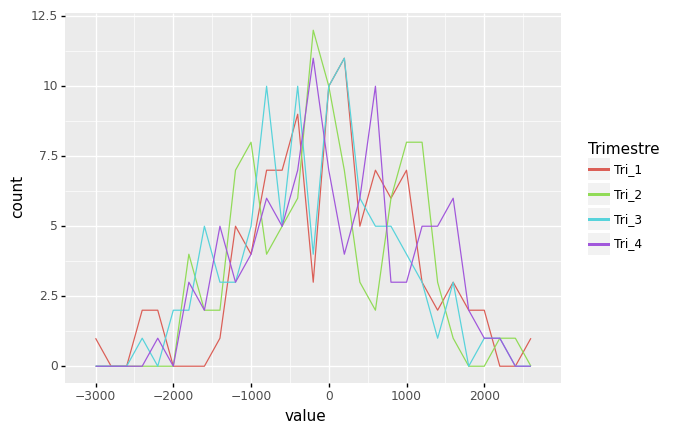

<ggplot: (29009122)>

In [5]:
(
    ggplot(df_tri, aes("value", colour  = "Trimestre")) + 
  geom_freqpoly(binwidth = 200)
)

Histograma por mes

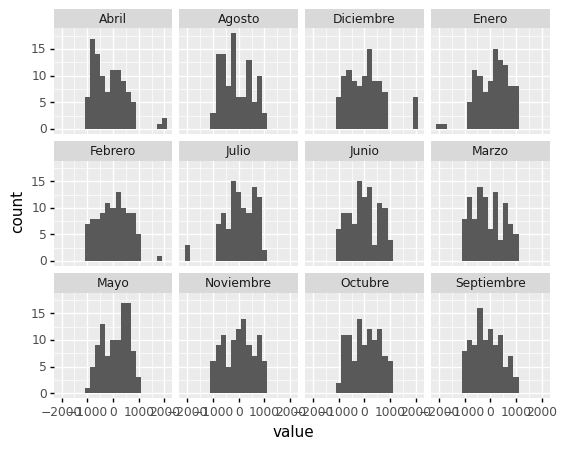

<ggplot: (28875864)>

In [6]:
(
    ggplot(df_long, aes(x = "value")) + geom_histogram(binwidth = 200)
    + facet_wrap("variable")
)

### Gráfico de barras

Para estos gráficos se calculan los gastos e ingresos por trimestre

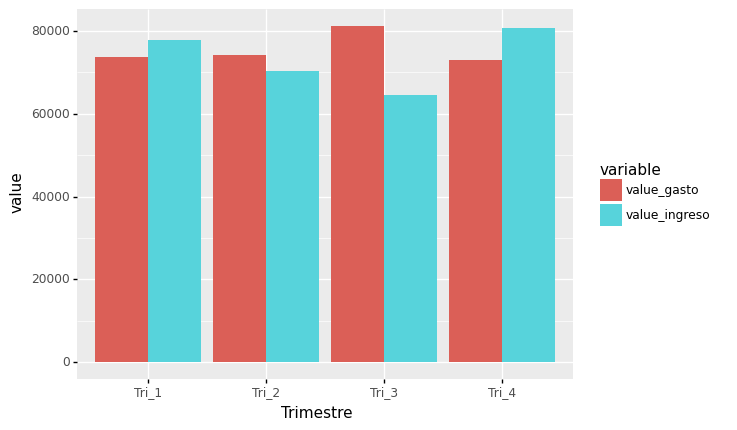

<ggplot: (31047277)>

In [7]:
# ingreso por trimestre 
df_tri_pos = df_long[df_long.value >= 0].groupby(['Trimestre']).value.sum().to_frame().reset_index()

# gasto por trimestre 
df_tri_neg = df_long[df_long.value < 0].groupby(['Trimestre']).value.sum().to_frame().reset_index()

# agrupamos en un solo dataframe 
df_tri_tot = df_tri_pos.merge(df_tri_neg, on="Trimestre", suffixes = ("_ingreso","_gasto"))
df_tri_tot.value_gasto = -df_tri_tot.value_gasto

# de wide a long dataframe
df_tri_long = pd.melt(df_tri_tot, id_vars=['Trimestre'], value_vars=['value_ingreso', 'value_gasto'])

(
  ggplot(df_tri_long) + geom_col(aes('Trimestre', 'value', fill='variable'), position="dodge")
)

### Gráfico de violin

Similar al gráfico de cajas (del cual se habla en la siguiente actividad) el gráfico de violin muestra la distribución de los datos

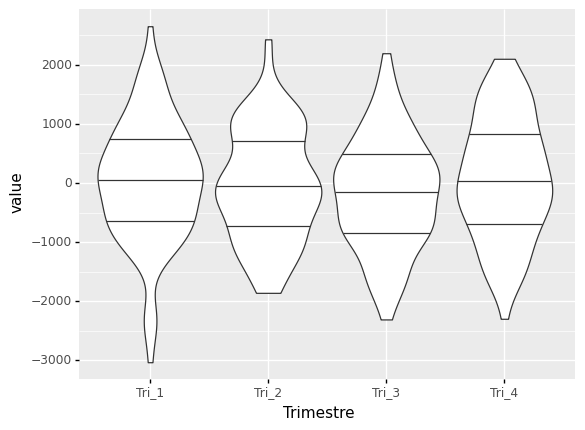

<ggplot: (29063581)>

In [8]:
(
    ggplot(df_tri, aes(x = "Trimestre", y = "value")) +
    geom_violin(draw_quantiles = [0.25, 0.5, 0.75])
)

## Actividad 2

**Segunda parte de la Actividad** (Hasta 6 puntos) (entre 10 y 12 puntos la actividad será evaluada con un 10, obviamente)

Copia las preguntas mencionadas a continuación y colócalas en celdas separadas, respondiendo a las mismas de forma ordenada)

Pregunta 1

Respuesta 1

Pregunta 2

Respuesta 2

Y así sucesivamente..

La estadística es una materia muy importante en Data Science.

Existen algunos conceptos importantes, y a su vez, relacionados con Gráficos.

Los “diagramas de cajas” son un elemento importante de los mismos.

**Pregunta 1** (hasta 3 puntos)

Encuentra un ejemplo donde poder mostrar estos gráficos con Python (el que quieras) simplemente se pide mostrar esas Gráficos con el ejemplo.

**Respuesta**: usando los datos de la actividad anterior se realiza el gráfico de cajas para cada uno de los meses

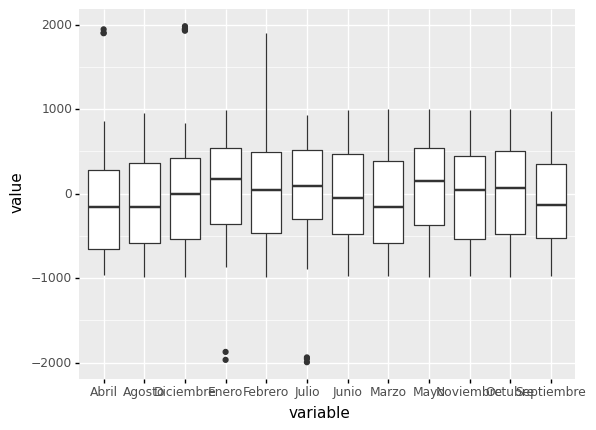

<ggplot: (29180004)>

In [9]:
(
    ggplot(df_long, aes(x='variable', y='value'))
    + geom_boxplot()
)

**Pregunta 2** (hasta 1 punto)

¿ Qué son Q1, Q2, Q3 ?

**Respuesta**: Q1, Q2 y Q3 hacen referencia a los cuantiles que es que dividen los datos, mas especificamente:

<lo>
    <li>Q1: es la media de la mitad de los datos de menor valor, es decir, agrupa al 25% de los datos de menor valor.
    <li>Q2: es la media de todos los datos, es decir, el valor que divide los 2 en dos grupos, 50% de los datos de menor valor y 50% de los datos de mayor valor
    <li>Q3: análogo a Q1, Q3 es la media de los datos de mayor valor, es decir, agrupa al 25% de los datos de mayor valor
<lo>

**Pregunta 3** (hasta 1 punto)

¿ Qué son los “outliers” ? ¿ son mostrados en estos diagramas de cajas?

**Respuesta**: *outliers*, o valores anómalos en español, son valores que no corresponden, no son consistentes, con la distribución de los datos de la muestra. Estos se observan en el diagrama de cajas y se representan mediante puntos, tal como se observa en el diagrama de cajas previo.

**Pregunta 4** (hasta 1 punto)

Comenta brevemente cualquier otra cosa que te llame la atención de estos diagramas, o añade algo de información.

Si no se te ocurre nada, si quieres puedes comentar cómo se llaman estos diagramas de cajas de otra forma distinta en idioma español o incluso en idioma inglés (por ejemplo).

**Respuesta**: el diagrama de cajas, boxplot en inglés, permiten observar de manera rápida el distrbución de los datos, si esta se distribuye de manera uniforme en los diferentes cuantiles y si tienen valores anómalos. El largo de los bigotes (lineas verticales en los extremos de las cajas) indican el límite mínimo y límite máximo para que un dato no sea identificado anómalo.